# In this task prediction is done on the Sell Price based on Square feet of an area using Linear-Regression method
## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

## Data Cleaning and Preperation

In [3]:
df.head()

,SqFt,Sell Price
0,2190,4700
1,2170,4600
2,2150,4350
3,1837,4125
4,1880,3810


In [4]:
df.columns

Index(['SqFt', 'Sell Price'], dtype='object')

In [5]:
df.dtypes

SqFt          int64
Sell Price    int64
dtype: object

Two types of attributes are here having same datatypes

In [6]:
df.isnull().sum()

SqFt          0
Sell Price    0
dtype: int64

No Null value exists in the data so we keep the data as it is.

In [7]:
df.describe()

,SqFt,Sell Price
count,36.000000,36.000000
mean,1785.888889,3640.333333
std,257.582583,486.493988
min,1360.000000,2914.000000
25%,1587.500000,3287.500000
50%,1780.000000,3592.500000
75%,2001.250000,4000.500000
max,2190.000000,4700.000000


## Checking Outliers

Boxplot is used to check the presence of outliers

<AxesSubplot:>

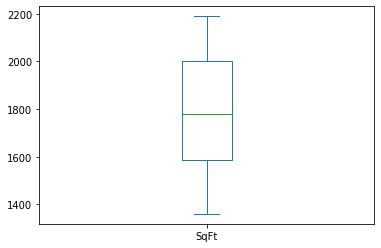

In [8]:
df['SqFt'].plot.box()

<AxesSubplot:>

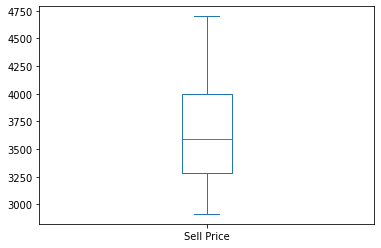

In [9]:
df['Sell Price'].plot.box()

Here no outliers are found in the dataset

## Data Analysis and Visualization 

analyze the data using graph

<AxesSubplot:xlabel='SqFt', ylabel='Sell Price'>

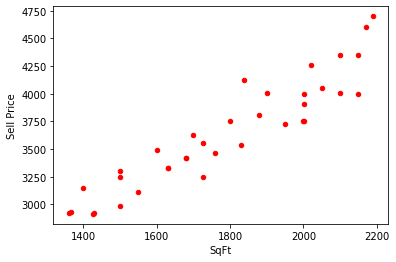

In [10]:
df.plot.scatter('SqFt','Sell Price', color='r')

From the above graph it is clear that there is a positive linear relationship between the two variabes which can also be confirmed by finding the correalation between the two

In [11]:
df.corr()

,SqFt,Sell Price
SqFt,1.000000,0.931672
Sell Price,0.931672,1.000000


## Model Building 

Here the data will be divided into train and test data and simple linear-regression model will be performed for this problem. 

In [12]:
x=df.drop('SqFt',axis=1)
y=df['SqFt']

In [13]:
x.shape

(36, 1)

In [14]:
y.shape

(36,)

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 0)

## Training the Model 

Here the data will be fitted in the linear-regression model

In [16]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(train_x,train_y)

LinearRegression()

## Model Visualization 

The regression line has equation :    $ y = b_{0} + b_{1}x $

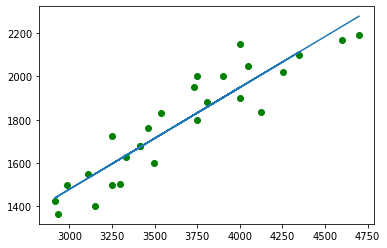

In [17]:
reg_line = lreg.intercept_ + lreg.coef_*x
plt.scatter(train_x, train_y, color='g')
plt.plot(x, reg_line)
plt.show()

## Prediction 

The training and visualisation of the model is done so now the prediction is to be performed.

In [18]:
pred = lreg.predict(test_x)
pred

array([1953.36175446, 1831.06254954, 1443.46814628, 1775.08714422,
       1949.12832044, 1443.46814628, 1739.80852741, 2113.76186552,
       1633.97267701])

In [19]:
test_y

31    2100
20    2000
16    1360
30    1700
22    2002
15    1430
10    1725
2     2150
11    1630
Name: SqFt, dtype: int64

In [21]:
df = pd.DataFrame({'Actual Sell Price':np.array(test_y), 'Predected Sell Price':pred})
df

,Actual Sell Price,Predected Sell Price
0,2100,1953.361754
1,2000,1831.062550
2,1360,1443.468146
3,1700,1775.087144
4,2002,1949.128320
5,1430,1443.468146
6,1725,1739.808527
7,2150,2113.761866
8,1630,1633.972677


Now the prediction of Sell Price($) is to be made on the given Sq.ft of land 

In [22]:
squareft= 3130
pred_SellPrice=lreg.predict([[squareft]])
pred_SellPrice

array([1539.89636554])

Thus, here it can be seen that the price for 3130sqft will be around $1539.9 

## Model Evaluation 

Model evaluation is performed to check wheather the predicted model is correct or not.

In [23]:
lreg.score(test_x, test_y)

0.8993139353694796

In [24]:
lreg.score(train_x, train_y)

0.8519945023294788

As it is seen that the $ r^2 $ value of training and the test data is almost closer to each other, we can conclude that the predicted model, is quite perfect. 

Now its required to find the mean squared error.
Less error represents that the model is well fitted.

In [25]:
from sklearn import metrics 
metrics.mean_squared_error(test_y, pred)

7463.636710325861

# Result

### For 3130sq.ft of land, about 1539.9 dollars will be the selling price that has to be spent. 